<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Mod4Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 4 Lab 4

####Q1.Try to run the same experiment after filtering different features, 2 at a time.

In [22]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt


In [23]:
ar = np.vstack([np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=50),
                np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=50)])

testAr = np.vstack([np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size=500),
                    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size=500)])

testy = np.array([0] * int((testAr.shape[0] / 2)) + [1] * int((testAr.shape[0] / 2)))
X = ar
y = np.array([0] * int((ar.shape[0] / 2)) + [1] * int((ar.shape[0] / 2)))


In [24]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()


In [25]:
def boundaryExp(feature_pairs):
    clf = svm.LinearSVC()
    for pair in feature_pairs:
        try:
            clf.fit(X[:, pair], y)
            plotDecisionBoundary(X, y, pair, clf)
        except IndexError as e:
            print(f"Error for feature pair {pair}: {e}")


In [26]:
feature_pairs_to_try = [
    [0, 1],
    [0, 2],
    [0, 3],
    [1, 2],
    [1, 3],
    [2, 3]
]


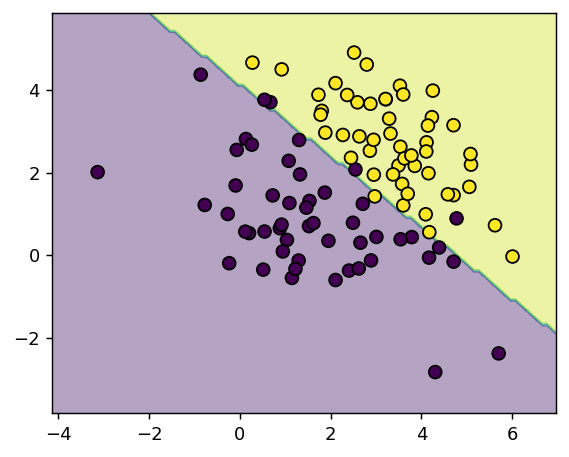

Error for feature pair [0, 2]: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [0, 3]: index 3 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2]: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 3]: index 3 is out of bounds for axis 1 with size 2
Error for feature pair [2, 3]: index 2 is out of bounds for axis 1 with size 2


In [27]:
boundaryExp(feature_pairs_to_try)

####Q2.Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [35]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [36]:
ar = np.vstack([np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=50),
                np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=50)])

testAr = np.vstack([np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size=500),
                    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size=500)])

testy = np.array([0] * int((testAr.shape[0] / 2)) + [1] * int((testAr.shape[0] / 2)))
X = ar
y = np.array([0] * int((ar.shape[0] / 2)) + [1] * int((ar.shape[0] / 2)))


In [38]:
print("Shape of X:", X.shape)

Shape of X: (100, 2)


In [39]:
def boundaryExp(kernel_type, feature_pairs):
    for pair in feature_pairs:
        try:
            if kernel_type == 'precomputed':
                # For 'precomputed' kernel, use a square matrix as input
                # In this example, use the identity matrix as a placeholder
                kernel_matrix = np.eye(X.shape[0])
                clf = svm.SVC(kernel=kernel_type)
                clf.fit(kernel_matrix, y)
                plotDecisionBoundary(X, y, pair, clf)
            else:
                clf = svm.SVC(kernel=kernel_type)
                clf.fit(X[:, pair], y)
                plotDecisionBoundary(X, y, pair, clf)
        except Exception as e:
            print(f"Error for feature pair {pair} with kernel {kernel_type}: {e}")


In [40]:
kernel_types_to_try = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']


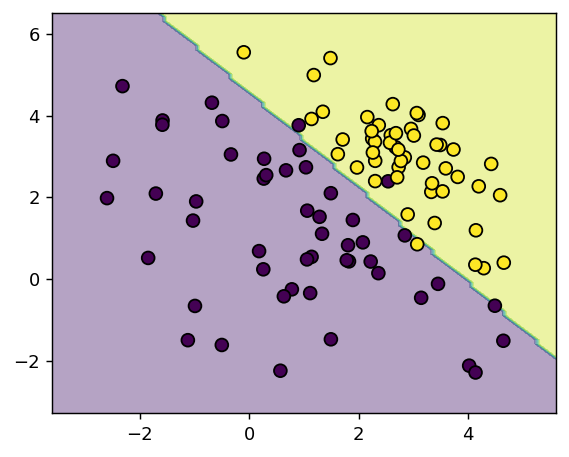

Error for feature pair [0, 2] with kernel linear: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2] with kernel linear: index 2 is out of bounds for axis 1 with size 2


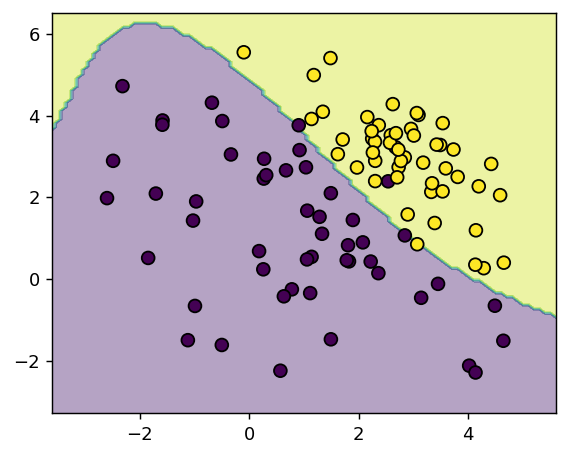

Error for feature pair [0, 2] with kernel poly: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2] with kernel poly: index 2 is out of bounds for axis 1 with size 2


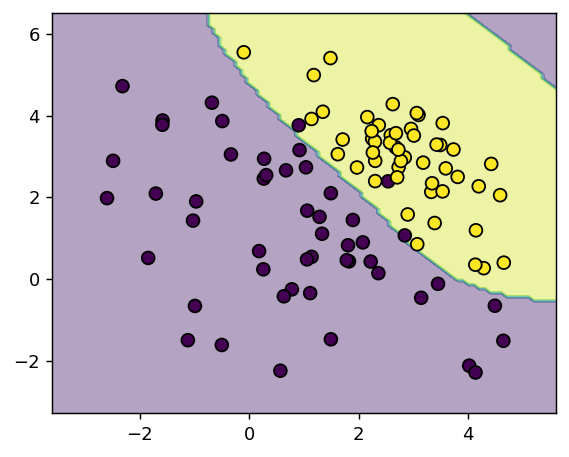

Error for feature pair [0, 2] with kernel rbf: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2] with kernel rbf: index 2 is out of bounds for axis 1 with size 2


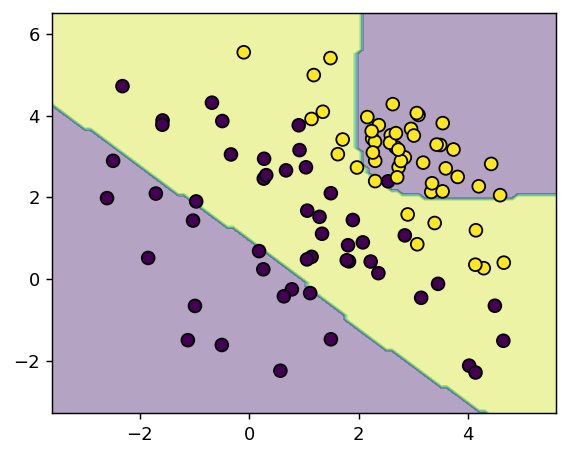

Error for feature pair [0, 2] with kernel sigmoid: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2] with kernel sigmoid: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [0, 1] with kernel precomputed: X has 2 features, but SVC is expecting 100 features as input.
Error for feature pair [0, 2] with kernel precomputed: index 2 is out of bounds for axis 1 with size 2
Error for feature pair [1, 2] with kernel precomputed: index 2 is out of bounds for axis 1 with size 2


In [42]:
feature_pairs_to_try = [
    [0, 1],
    [0, 2],
    [1, 2]
]

for kernel_type in kernel_types_to_try:
    boundaryExp(kernel_type, feature_pairs_to_try)